In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install imbalanced-learn xgboost pandas scikit-learn joblib

In [3]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

In [30]:
X = pd.read_csv("X_train_may28.csv")
y = pd.read_csv("y_train_may28.csv")
X_test = pd.read_csv("X_test_may28.csv")
y_test = pd.read_csv("y_test_may28.csv")

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [16]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}


In [18]:
best_models = {}

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

for name, mp in models.items():
    print(f'Training {name} model')
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X, y)
    best_models[name] = grid.best_estimator_
    

Training LogisticRegression model
Training RandomForest model


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Training XGBoost model


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:05:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:05:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:05:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:05:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Training SVM model


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [32]:
print(f"✅ Best params: {grid.best_params_}")
y_pred = grid.predict(X_test)    
print(f"📊 Classification Report for {name}:\n", classification_report(y_test, y_pred))

✅ Best params: {'C': 10, 'kernel': 'linear'}
📊 Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       578
           1       0.94      0.88      0.91       421

    accuracy                           0.93       999
   macro avg       0.93      0.92      0.92       999
weighted avg       0.93      0.93      0.93       999




📌 Feature Importance for: LogisticRegression


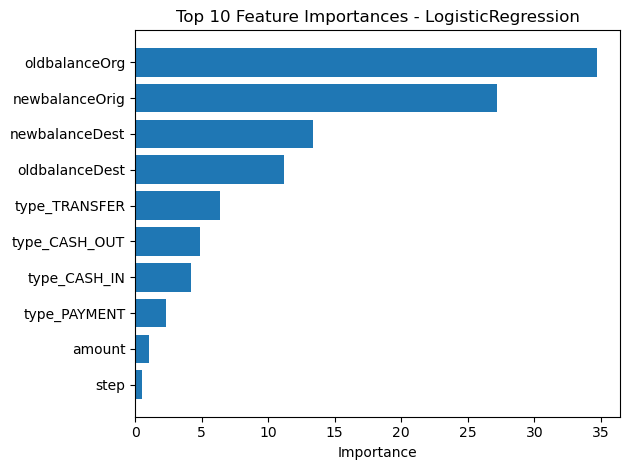


📌 Feature Importance for: RandomForest


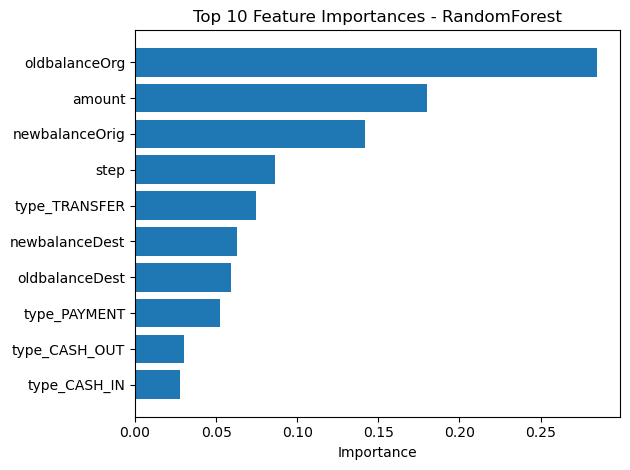


📌 Feature Importance for: XGBoost


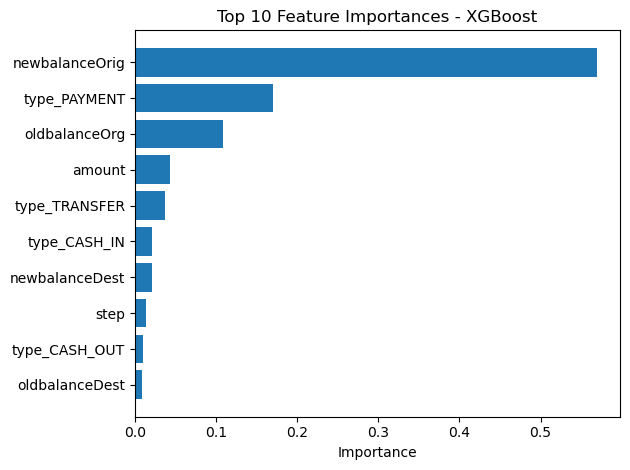


📌 Feature Importance for: SVM


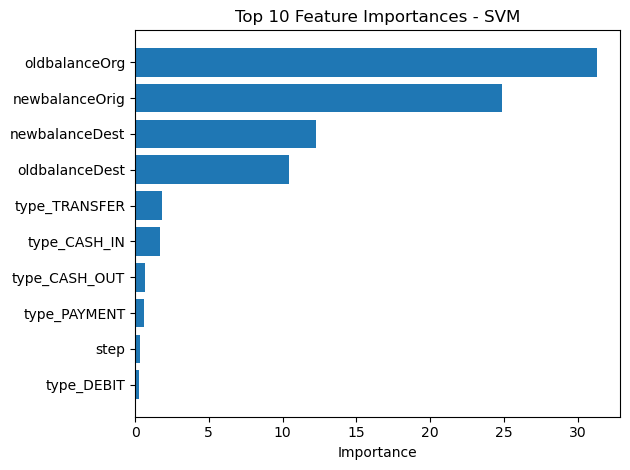

In [36]:
for name, model in best_models.items():
    print(f"\n📌 Feature Importance for: {name}")

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        print(f"⚠️ Feature importance not available for: {name}")
        continue

    # Sort top 10 features
    feature_names = X.columns
    sorted_idx = np.argsort(importances)[-10:]

    plt.figure()
    plt.barh(range(len(sorted_idx)), importances[sorted_idx])
    plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
    plt.xlabel("Importance")
    plt.title(f"Top 10 Feature Importances - {name}")
    plt.tight_layout()
    plt.show()

In [38]:
svm_model = best_models['SVM']
joblib.dump(svm_model, 'new_svm_model.pkl')
print('Saved model')

Saved model
